In [1]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import random
import tensorflow as tf
from tensorflow.keras.models import load_model

Pour faire la prédiction de l'âge j'ai utilisé un réseau de neurones qui traitaient les images en nuances de gris et non les images RGB mais quand ceux-ci seront entrainés je relancerais ces images pour vérifier si les performances sont meilleures.

In [2]:
# Use haar of opencv model to detect face
face_cascade = cv2.CascadeClassifier("haarcascade_frontalface_default.xml") 

In [5]:
# The emotions that we have
emotions = ('Angry', 'Disgust', 'Fear', 'Happy', 'Neutral', 'Sad', 'Surprise') 

In [6]:
img = cv2.imread("Photo_profil.jpg")
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
img_gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

In [7]:
faces = face_cascade.detectMultiScale(img_gray, 1.3, 5)

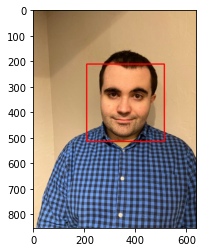

In [11]:
for (x, y, w, h) in faces:
    # We add contour to take the entire face
    y_c = y - int(img.shape[0]*0.02)
    x_c = x - int(img.shape[0]*0.02) 
    h_c = h + int(img.shape[0]*0.05)
    w_c = w + int(img.shape[0]*0.05)
    cv2.rectangle(img, (x_c, y_c), (x_c + w_c, y_c + h_c), (255,0,0), 4) # draw rectangle to main image face
    detected_face = img_gray[int(y_c):int(y_c + h_c), int(x_c):int(x_c + w_c)] # crop detected
plt.imshow(img)

In [12]:
detected_face.shape

(303, 303)

In [13]:
detected_face = cv2.resize(detected_face,(150,150))

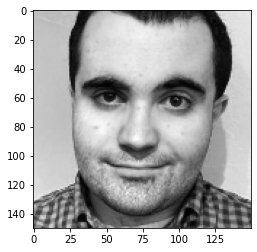

In [15]:
plt.imshow(detected_face,cmap="gray")

In [16]:
model = load_model("ModelSave/CNN_Emotion_Final_100.h5")

In [17]:
detected_face = detected_face.reshape(1,detected_face.shape[0],detected_face.shape[1],1)

In [18]:
emotions = ['angry','disgusted','fearful','happy','neutral','sad','surprised']
print(emotions)

['angry', 'disgusted', 'fearful', 'happy', 'neutral', 'sad', 'surprised']


In [19]:
y_p = model.predict(detected_face)

In [20]:
y_p

array([[2.8273510e-03, 6.5754248e-06, 2.0612089e-03, 6.4130706e-01,
        3.4974480e-01, 3.5112735e-03, 5.4177048e-04]], dtype=float32)

In [21]:
y_p = np.argmax(y_p)

In [22]:
y_p

3

In [23]:
age_model = load_model("ModelSave/CNN_Age_Final_100.h5")

In [28]:
age = age_model.predict(detected_face)
age[0][0]-=9 # We substract 9 because it's the mse (mean error)
# We substract because the model predict the age with an average error of 8 years
print(age)

[[23.798439]]


In [29]:
age_p = age[0][0]

In [30]:
age_p

23.798439

In [31]:
cv2.putText(img,emotions[y_p], (int(x_c-80), int(y_c-50)), cv2.FONT_HERSHEY_SIMPLEX,1.5, (255,0,0),4)
cv2.putText(img,"Age : "+str(age_p), (int(x_c-80), int(y_c-100)), cv2.FONT_HERSHEY_SIMPLEX,1.5, (255,0,0),4)

array([[[120,  91,  57],
        [121,  92,  58],
        [123,  94,  60],
        ...,
        [214, 177, 124],
        [217, 180, 128],
        [171, 134,  82]],

       [[120,  91,  57],
        [122,  93,  59],
        [123,  94,  60],
        ...,
        [215, 178, 125],
        [218, 181, 129],
        [171, 134,  82]],

       [[120,  91,  57],
        [122,  93,  59],
        [124,  95,  61],
        ...,
        [216, 179, 126],
        [218, 181, 129],
        [171, 134,  82]],

       ...,

       [[252, 223, 179],
        [252, 224, 177],
        [250, 223, 176],
        ...,
        [ 39,  44,  48],
        [ 32,  33,  38],
        [ 26,  27,  31]],

       [[252, 223, 179],
        [252, 224, 177],
        [250, 223, 176],
        ...,
        [ 28,  33,  37],
        [ 23,  24,  29],
        [ 14,  15,  19]],

       [[252, 223, 179],
        [252, 224, 177],
        [250, 223, 176],
        ...,
        [ 26,  31,  35],
        [ 24,  25,  30],
        [ 13,  14,  18]]

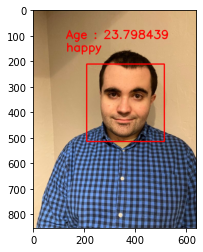

In [32]:
plt.imshow(img)

In [33]:
cv2.imshow("Image",img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [34]:
plt.imsave("Photo_Traité.jpg",img)